# Supervised learning

## Linear Regression

 Two ways of doing linear regression:
 
 - By applying the squared (or absolute) trick at every point in our data one by one, and repeating this process many times.
 - By applying the squared (or absolute) trick at every point in our data all at the same time, and repeating this process many times.

More specifically, the squared (or absolute) trick, when applied to a point, gives us some values to add to the weights of the model. We can add these values, update our weights, and then apply the squared (or absolute) trick on the next point. Or we can calculate these values for all the points, add them, and then update the weights with the sum of these values.

The latter is called **batch gradient descent**. The former is called **stochastic gradient descent**.

If your data is huge, both are a bit slow, computationally. The best way to do linear regression, is to split your data into many small batches. Each batch, with roughly the same number of points. Then, use each batch to update your weights. This is still called **mini-batch gradient descent**.

### absolute trick

$$y = (w_1 + p\alpha)x + (w_2 + p\alpha)$$

Sendo $p$ a distancia do ponto ao eixo y e $\alpha$ o coeficiente de aprendizado

### Square trick

$$y = (w_1 + p(q - q')\alpha)x +(w_2 + (q - q')\alpha)$$

Sendo $p$ a distancia do ponto ao eixo y e $\alpha$ o coeficiente de aprendizado.\
$q$ o valor y do ponto e $q'$ o valor y da equação no valor x do ponto fornecido.

### Gradient of Error Function (Gradient Descent)

$$w_i \rightarrow w_i - \alpha\dfrac{\partial}{\partial w_i}Error$$

### Mean Absolute Error

$$Error = \dfrac{\sum^m_{i=1}|{y - y'}|}{m}$$

Sendo $m$ o número de pontos, $y$ a cordenada y do ponto e $y'$ a cordenada y da linha no x do ponto.

### Mean Squared Error
 
$$Error = \dfrac{\sum^m_{i=1}{(y - y')^2}}{2m}$$

## Python Mini-batch Implementation

In [9]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

In [3]:
def MSEStep(X, y, W, b, learn_rate = 0.005):
    """
    This function implements the gradient descent step for squared error as a
    performance metric.
    
    Parameters
    X : array of predictor features
    y : array of outcome values
    W : predictor feature coefficients
    b : regression function intercept
    learn_rate : learning rate

    Returns
    W_new : predictor feature coefficients following gradient descent step
    b_new : intercept following gradient descent step
    """
    
    # compute errors
    y_pred = np.matmul(X, W) + b
    error = y - y_pred
    
    # compute steps
    W_new = W + learn_rate * np.matmul(error, X)
    b_new = b + learn_rate * error.sum()
    
    return W_new, b_new

In [4]:
def miniBatchGD(X, y, batch_size = 20, learn_rate = 0.005, num_iter = 25):
    """
    This function performs mini-batch gradient descent on a given dataset.

    Parameters
    X : array of predictor features
    y : array of outcome values
    batch_size : how many data points will be sampled for each iteration
    learn_rate : learning rate
    num_iter : number of batches used

    Returns
    regression_coef : array of slopes and intercepts generated by gradient
      descent procedure
    """
    n_points = X.shape[0]
    W = np.zeros(X.shape[1]) # coefficients
    b = 0 # intercept
    
    # run iterations
    regression_coef = [np.hstack((W,b))]
    for _ in range(num_iter):
        batch = np.random.choice(range(n_points), batch_size)
        X_batch = X[batch,:]
        y_batch = y[batch]
        W, b = MSEStep(X_batch, y_batch, W, b, learn_rate)
        regression_coef.append(np.hstack((W,b)))
    
    return regression_coef

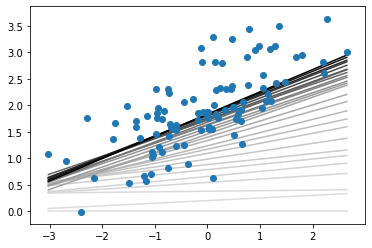

In [11]:
data = np.loadtxt('mini-batch-data.csv', delimiter = ',')
X = data[:,:-1]
y = data[:,-1]
regression_coef = miniBatchGD(X, y)
    
# plot the results
plt.figure()
X_min = X.min()
X_max = X.max()
counter = len(regression_coef)
for W, b in regression_coef:
    counter -= 1
    color = [1 - 0.92 ** counter for _ in range(3)]
    plt.plot([X_min, X_max],[X_min * W + b, X_max * W + b], color = color)
plt.scatter(X, y, zorder = 3)
plt.show()

## Multiple Linear Regression

$$y = m_1x_1 + m_2x_2 + m_3x_3 + \ldots + m_nx_n + b$$

## Making predictions with Linear Regression using Scikit-learn

In [18]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Assign the dataframe to this variable.
bmi_life_data = pd.read_csv('data/bmi_and_life_expectancy.csv')

# Make and fit the linear regression model
bmi_life_model = LinearRegression()
bmi_life_model.fit(bmi_life_data[['BMI']], bmi_life_data[['Life expectancy']])

# Make a prediction using the model
laos_life_exp = bmi_life_model.predict([[21.07931]])

Printing the predicted life expectancy with BMI 21.07931:

In [19]:
print(laos_life_exp)

[[60.31564716]]


## Multiple Linear Regression prediction

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

# Load the data from the boston house-prices dataset 
boston_data = load_boston()
x = boston_data['data']
y = boston_data['target']

# Make and fit the linear regression model
model = LinearRegression()
model.fit(x, y)

# Make a prediction using the model
sample_house = [[2.29690000e-01, 0.00000000e+00, 1.05900000e+01, 0.00000000e+00, 4.89000000e-01,
                6.32600000e+00, 5.25000000e+01, 4.35490000e+00, 4.00000000e+00, 2.77000000e+02,
                1.86000000e+01, 3.94870000e+02, 1.09700000e+01]]


prediction = model.predict(sample_house)

In [3]:
print(prediction)

[23.68284712]


## Linear Regression warnings

 - Linear Regression works best when the data is linear, if the relationship in the training data is not really linear, you'll need to either make adjustments (transform your training data), add features, or use another kind of model.
 - Linear Regression is Sensitive to Outliers, if your dataset has some outlying extreme values that don't fit a general pattern, they can have a surprisingly large effect. 

# Polynomial Regression

$$\hat{y} = w_1x^{n-1} + w_2x^{n-2} + \ldots + w_{n-1}x + w_n$$

Take the **mean absolute** or **squared error**, then take the derivative in respect of the n variables and use **gradient descent** to modify these n weights in order to minimize the error.

In [8]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Assign the data to predictor and outcome variables
train_data = pd.read_csv('data/polynomial_regression.csv')
X = train_data['Var_X'].values.reshape((20, 1))
y = train_data['Var_Y']

# Create polynomial features
poly_feat = PolynomialFeatures(4)
X_poly = poly_feat.fit_transform(X, y)

# Make and fit the polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Regularization

Used to penalize more complex models and choose the simpler one, even if the error is a little bigger.

## L1 Regularization

Given the function:

$$y = m_1x_1 + m_2x_2 + m_3x_3 + \ldots + m_nx_n + b$$

We add the sum absolute value of the coeficients multiplied by $\lambda$ (to adjust how much it's desired to punish the model for it's complexity) to the error:

$$Error = Error + (|m_1| + |m_2| + |m_3| + \ldots + |m_n|)\lambda$$

## L2 Regularization

It follows the same idea of L1 method, but instead of adding the absolute value, it adds the squared value:

$$Error = Error + (m_1^2 + m_2^2 + m_3^2 + \ldots + m_n^2)\lambda$$

## L1 vs L2

| L1 Regularization | L2 Regularization |
|---|---|
| Computationally Inefficient<br>(unless data is sparse) | Computationally Efficient |
| Sparse Outputs | Non-Sparse Outrputs |
| Feature Selection | No feature Selection |

In [9]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso

train_data = pd.read_csv('data/regularization-data.csv', header = None)
X = train_data.iloc[:,:-1]
y = train_data.iloc[:,-1]

lasso_reg = Lasso()

lasso_reg.fit(X, y)

reg_coef = lasso_reg.coef_
print(reg_coef)

[ 0.          2.35793224  2.00441646 -0.05511954 -3.92808318  0.        ]


## Feature Scaling

Feature scaling is a way of transforming your data into a common range of values. There are two common scalings:

 - Standardizing
 - Normalizing

### Standardizing

Standardizing is completed by taking each value of your column, subtracting the mean of the column, and then dividing by the standard deviation of the column. This type of feature scaling is by far the most common of all techniques.

```
df["height_standard"] = (df["height"] - df["height"].mean()) / df["height"].std()
```

This will create a new "standardized" column where each value is a comparison to the mean of the column, and a new, standardized value can be interpreted as the number of standard deviations the original height was from the mean.

### Normalizing

With normalizing, data are scaled between 0 and 1.

```
df["height_normal"] = (df["height"] - df["height"].min()) /     \
                      (df["height"].max() - df['height'].min())
```

### When to use Feature Scaling

In many machine learning algorithms, the result will change depending on the units of your data. This is especially true in two specific cases:

 - When your algorithm uses a distance-based metric to predict.
 - When you incorporate regularization.
 
Feature scaling can speed up convergence of your machine learning algorithms, which is an important consideration when you scale machine learning applications.

#### DIstance based metrics

One common supervised learning technique that is based on the distance points are from one another called **Support Vector Machines (SVMs)**. Another technique that involves distance based methods to determine a prediction is **k-nearest neighbors (k-nn)**. With either of these techniques, choosing not to scale your data may lead to drastically different (and likely misleading) ending predictions. 

#### Regularization

When you start introducing regularization, you will again want to scale the features of your model. The penalty on particular coefficients in regularized linear regression techniques depends largely on the scale associated with the features. When one feature is on a small range, say from 0 to 10, and another is on a large range, say from 0 to 1 000 000, applying regularization is going to unfairly punish the feature with the small range. Features with small ranges need to have larger coefficients compared to features with large ranges in order to have the same effect on the outcome of the data. (Think about how $ab = ba$ for two numbers $a$ and $b$.) Therefore, if regularization could remove one of those two features with the same net increase in error, it would rather remove the small-ranged feature with the large coefficient, since that would reduce the regularization term the most.

Again, this means you will want to scale features any time you are applying regularization.

### Feature Scaling in Python

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

train_data = pd.read_csv('data/regularization-data.csv', header = None)
X = train_data.iloc[:,:-1]
y = train_data.iloc[:,-1]

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

lasso_reg = Lasso()

lasso_reg.fit(X_scaled, y)

reg_coef = lasso_reg.coef_
print(reg_coef)

[  0.           3.90753617   9.02575748  -0.         -11.78303187
   0.45340137]


# Classification

## Linear boundaries

$$w_1x_1 + w_2x_2 + b = 0$$
$$Wx + b = 0$$
$$W = (w_1, w_2)$$
$$x = (x_1, x_2)$$
$$y = label: 0\ or\ 1$$

$\hat{y}$ (the prediction) will be 1 if $Wx + b  \geqslant  0$ and 0 if $Wx + b < 0$

### Higher dimensions

$$w_1x_1 + w_2x_2 + \ldots + w_nx_n + b = 0$$
$$Wx + b = 0$$
$$W = (w_1, w_2, \ldots, w_n)$$
$$x = (x_1, x_2, \ldots, x_n)$$
$$y = label: 0\ or\ 1$$

$\hat{y}$ (the prediction) will be 1 if $Wx + b  \geqslant  0$ and 0 if $Wx + b < 0$

## Perceptrons

Perceptrons are nodes that represents the formulas above and can be used as logical operators. 

### AND Perceptron

In [1]:
import pandas as pd

# TODO: Set weight1, weight2, and bias
weight1 = 1
weight2 = 1
bias = -1.5

test_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
correct_outputs = [False, False, False, True]
outputs = []


for test_input, correct_output in zip(test_inputs, correct_outputs):
    linear_combination = weight1 * test_input[0] + weight2 * test_input[1] + bias
    output = int(linear_combination >= 0)
    is_correct_string = 'Yes' if output == correct_output else 'No'
    outputs.append([test_input[0], test_input[1], linear_combination, output, is_correct_string])

num_wrong = len([output[4] for output in outputs if output[4] == 'No'])
output_frame = pd.DataFrame(outputs, columns=['Input 1', '  Input 2', '  Linear Combination', '  Activation Output', '  Is Correct'])
if not num_wrong:
    print('Nice!  You got it all correct.\n')
else:
    print('You got {} wrong.  Keep trying!\n'.format(num_wrong))
print(output_frame.to_string(index=False))

Nice!  You got it all correct.

 Input 1    Input 2    Linear Combination    Activation Output   Is Correct
       0          0                  -1.5                    0          Yes
       0          1                  -0.5                    0          Yes
       1          0                  -0.5                    0          Yes
       1          1                   0.5                    1          Yes


### NOT Perceptron

In [2]:
import pandas as pd

# TODO: Set weight1, weight2, and bias
weight1 = 0.0
weight2 = -1
bias = 0.0

test_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
correct_outputs = [True, False, True, False]
outputs = []

for test_input, correct_output in zip(test_inputs, correct_outputs):
    linear_combination = weight1 * test_input[0] + weight2 * test_input[1] + bias
    output = int(linear_combination >= 0)
    is_correct_string = 'Yes' if output == correct_output else 'No'
    outputs.append([test_input[0], test_input[1], linear_combination, output, is_correct_string])

num_wrong = len([output[4] for output in outputs if output[4] == 'No'])
output_frame = pd.DataFrame(outputs, columns=['Input 1', '  Input 2', '  Linear Combination', '  Activation Output', '  Is Correct'])
if not num_wrong:
    print('Nice!  You got it all correct.\n')
else:
    print('You got {} wrong.  Keep trying!\n'.format(num_wrong))
print(output_frame.to_string(index=False))

Nice!  You got it all correct.

 Input 1    Input 2    Linear Combination    Activation Output   Is Correct
       0          0                   0.0                    1          Yes
       0          1                  -1.0                    0          Yes
       1          0                   0.0                    1          Yes
       1          1                  -1.0                    0          Yes


### XOR Perceptron

The XOR operator needs to be done using a multi-layer perceptron consisting of operators AND, NOT (or NAND) and OR. This multi-layer perceptron can be considered a neural network.

### Perceptron algorithm

 1. Start with random weights: $w_1, w_2, \ldots, w_n, b$
 2. For every misclassified point ($x_1, \ldots, x_n$):
     1. If *predction* = 0:
         1. For $i = 1\ldots n$:
             1. Change $w_i$ to $w_i + \alpha x_i$
         2. Change $b$ to $b + \alpha$
     2. If *prediction* = 1:
         1. For $i = 1\ldots n$:
             1. Change $w_i$ to $w_i - \alpha x_i$
         2. Change $b$ to $b - \alpha$
         
$\alpha$ being the learning rate coeficient.

#### Python implementation

In [3]:
import numpy as np
# Setting the random seed, feel free to change it and see different solutions.
np.random.seed(42)

def stepFunction(t):
    if t >= 0:
        return 1
    return 0

def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])

# The function should receive as inputs the data X, the labels y,
# the weights W (as an array), and the bias b,
# update the weights and bias W, b, according to the perceptron algorithm,
# and return W and b.
def perceptronStep(X, y, W, b, learn_rate = 0.01):
    for i in range(len(X)):
        y_hat = prediction(X[i], W, b)
        
        if y[i] - y_hat == 1:
            W[0] += learn_rate * X[i][0]
            W[1] += learn_rate * X[i][1]
            b += learn_rate
        elif y[i] - y_hat == -1:
            W[0] -= learn_rate * X[i][0]
            W[1] -= learn_rate * X[i][1]
            b -= learn_rate
    return W, b
    
# This function runs the perceptron algorithm repeatedly on the dataset,
# and returns a few of the boundary lines obtained in the iterations,
# for plotting purposes.
# Feel free to play with the learning rate and the num_epochs,
# and see your results plotted below.
def trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 25):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    # These are the solution lines that get plotted below.
    boundary_lines = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
    return boundary_lines

# Decision Trees

## Entropy

$$Entropy = - \dfrac{m}{m + n}\log_2(\dfrac{m}{m + n}) - \dfrac{n}{m + n}\log_2(\dfrac{n}{m + n})$$

We can state this in terms of probabilities instead using:

$$p_1 = \dfrac{m}{m + n}$$

$$p_2 = \dfrac{n}{m + n}$$

Then:

$$Entropy = - p_1\log_2(p_1) - p_2\log_2(p_2)$$

This entropy equation can be extended to the multi-class case, where we have three or more possible values:

$$Entropy = - p_1\log_2(p_1) - p_2\log_2(p_2) - \ldots - p_n\log_2(p_n) = \sum_{i=1}^{n}p_i\log_2(p_i)$$

### Python implementation

In [8]:
import numpy as np

def calculateEntropy(arr):
    entropy = 0
    
    for i in range(len(arr)):
        p = calculateProbability(i, arr)
        entropy -= p * np.log2(p)
        
    return entropy
        
def calculateProbability(index, arr):
    sum = 0
    for i in range(len(arr)):
        sum += arr[i]
        
    return arr[index] / sum

In [14]:
print(calculateEntropy([8, 3, 2]))

1.3346791410515946


## Information Gain Formula

In general, the average entropy for the child groups will need to be a weighted average, based on the number of cases in each child group. That is, for $m$ items in the first child group and $n$ items in the second child group, the information gain is:

$$Information Gain = Entropy(parent) - [\dfrac{m}{m + n}Entropy(child_1) + \dfrac{n}{n + m}Entropy(child_2)]$$

In [5]:
def calculateInformationGain(entropy_parent, arr_entropy_child, arr_child_weights):
    entropy_children = 0
    sum_weights = sum(arr_child_weights)
    
    for i in range(len(arr_entropy_child)):
            entropy_children += (arr_entropy_child[i] * arr_child_weights[i]) / sum_weights
        
    return entropy_parent - entropy_children

In [6]:
def calculateEntropyChild(arr_data, filter_type, filter_value, compare_number = False):
    
    if compare_number:
        data = arr_data[arr_data[filter_type] < filter_value]
        data_not = arr_data[arr_data[filter_type] >= filter_value]
    else:
        data = arr_data[arr_data[filter_type] == filter_value]
        data_not = arr_data[arr_data[filter_type] != filter_value]

    entropy_child = calculateEntropy([
        np.count_nonzero(data['Species'] == 'Mobug'), 
        np.count_nonzero(data['Species'] == 'Lobug')
    ])

    entropy_child_not = calculateEntropy([
        np.count_nonzero(data_not['Species'] == 'Mobug'), 
        np.count_nonzero(data_not['Species'] == 'Lobug')
    ])

    return entropy_child, entropy_child_not, len(data), len(data_not)

In [9]:
import pandas as pd
import numpy as np
    
bugs_data = pd.read_csv('data/ml-bugs.csv')

p_mobug = np.count_nonzero(bugs_data['Species'] == 'Mobug') / len(bugs_data['Species'])
p_lobug = np.count_nonzero(bugs_data['Species'] == 'Lobug') / len(bugs_data['Species'])

entropy_parent = calculateEntropy([
    np.count_nonzero(bugs_data['Species'] == 'Mobug'), 
    np.count_nonzero(bugs_data['Species'] == 'Lobug')
])

entropy_child_brown, entropy_child_not_brown, \
    len_brown, len_not_brown = calculateEntropyChild(bugs_data, 'Color', 'Brown')

print('Information gain with brown criteria: ' 
      + str(calculateInformationGain(
          entropy_parent, 
          [entropy_child_brown, entropy_child_not_brown], 
          [len_brown, len_not_brown]
      ))
     )

entropy_child_blue, entropy_child_not_blue, \
    len_blue, len_not_blue = calculateEntropyChild(bugs_data, 'Color', 'Blue')

print('Information gain with blue criteria: ' 
      + str(calculateInformationGain(
          entropy_parent, 
          [entropy_child_blue, entropy_child_not_blue], 
          [len_blue, len_not_blue]
      ))
     )

entropy_child_green, entropy_child_not_green, \
    len_green, len_not_green = calculateEntropyChild(bugs_data, 'Color', 'Green')

print('Information gain with green criteria: ' 
      + str(calculateInformationGain(
          entropy_parent, 
          [entropy_child_green, entropy_child_not_green], 
          [len_green, len_not_green]
      ))
     )

entropy_child_17, entropy_child_not_17, \
    len_17, len_not_17 = calculateEntropyChild(bugs_data, 'Length (mm)', 17, True)

print('Information gain with 17 criteria: ' 
      + str(calculateInformationGain(
          entropy_parent, 
          [entropy_child_17, entropy_child_not_17], 
          [len_17, len_not_17]
      ))
     )

entropy_child_20, entropy_child_not_20, \
    len_20, len_not_20 = calculateEntropyChild(bugs_data, 'Length (mm)', 20, True)

print('Information gain with 20 criteria: ' 
      + str(calculateInformationGain(
          entropy_parent, 
          [entropy_child_20, entropy_child_not_20], 
          [len_20, len_not_20]
      ))
     )

Information gain with brown criteria: 0.06157292259666325
Information gain with blue criteria: 0.000589596275060833
Information gain with green criteria: 0.042776048498108565
Information gain with 17 criteria: 0.11260735516748976
Information gain with 20 criteria: 0.10073322588651734


## Hyperparameters for Decision Trees

In order to create decision trees that will generalize to new problems well, we can tune a number of different aspects about the trees. We call the different aspects of a decision tree "hyperparameters". These are some of the most important hyperparameters used in decision trees:

### Maximum Depth

The maximum depth of a decision tree is simply the largest possible length between the root to a leaf. A tree of maximum length $k$ can have at most $2^k$ leaves.

### Minimum number of samples to split

A node must have at least `min_samples_split` samples in order to be large enough to split. If a node has fewer samples than `min_samples_split` samples, it will not be split, and the splitting process stops. However, `min_samples_split` doesn't control the minimum size of leaves.

### Minimum number of samples per leaf

When splitting a node, one could run into the problem of having 99 samples in one of them, and 1 on the other. This will not take us too far in our process, and would be a waste of resources and time. If we want to avoid this, we can set a minimum for the number of samples we allow on each leaf.

This number can be specified as an integer or as a float. If it's an integer, it's the minimum number of samples allowed in a leaf. If it's a float, it's the minimum percentage of samples allowed in a leaf. For example, 0.1, or 10%, implies that a particular split will not be allowed if one of the leaves that results contains less than 10% of the samples in the dataset.

If a threshold on a feature results in a leaf that has fewer samples than `min_samples_leaf`, the algorithm will not *allow* that split, but it may perform a split on the same feature at a *different threshold*, that *does* satisfy min_samples_leaf.


## Decision tree python implementation

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

# Read the data.
data = np.asarray(pd.read_csv('data/decision-tree-predict.csv', header=None))
# Assign the features to the variable X, and the labels to the variable y. 
X = data[:,0:2]
y = data[:,2]

# You won't need to, but if you'd like, play with hyperparameters such
# as max_depth and min_samples_leaf and see what they do to the decision
# boundary.
model = DecisionTreeClassifier(max_depth = 7)
model.fit(X, y)

y_pred = model.predict(X)

acc = accuracy_score(y, y_pred)
print(acc)

1.0


# Naive Bayes

## Bayes Theorem

| Know      | Inferred |
|:---------:|:----------:|
| $P(A)$      | $P(A|R)$  |
| $P(R|A)$ |          |

Formula:

$$P(A|R) = \dfrac{P(A)P(R|A)}{P(A)P(R|A) + P(B)P(R|B)}$$

$P(A)$ is the prior probrability (what we knew before we knew $R$ occorred) and $P(A|R)$ is the posterior (what we inferred after we new what occurred).

## Naive Bayes algorithm

The algorithm uses the two techniques described bellow (naive assumption and conditional probability) to find a probability in a more naive an computationally easier manner.

### Naive assumption

It's assumed that:

$$P(A\cap B) = P(A)P(B)$$

Even if P(A) and P(B) are dependant, that's why it's naive.

### Conditional probability

$$P(A|B)P(B) = P(B|A)P(A)$$

Then:

$$P(A|B) \propto P(B|A)P(A)$$

($\propto$ is the symbol to "is proportional to").

To get the actual probability (that sums to 1), it's needed to divide the resulting proportional probabilities by the sum of them.

---

Q: Suppose you have a bag with **three standard 6-sided dice** with face values [1,2,3,4,5,6] and **two non-standard 6-sided dice** with face values [2,3,3,4,4,5]. Someone draws a die from the bag, rolls it, and announces it was a 3. What is the probability that the die that was rolled was a standard die?

R:
We are trying to get:

$$P(s|3) = ?$$

So by the conditional probability technique:

$$P(s|3) \propto P(3|s)P(s)$$

And we can calculate $P(3|s)$ and $P(s)$ as follow:

$$P(3|s) = \dfrac{3}{18} = \dfrac{1}{6}$$

$$P(s) = \dfrac{3}{5}$$

So:

$$P(s|3) \propto \dfrac{1}{6}\dfrac{3}{5} = \dfrac{3}{30} = \dfrac{1}{10}$$

And to normalize, first we have to calculate the probability of getting a non-standard die when we get a three:

$$P(ns|3) \propto P(3|ns)P(ns) = \dfrac{1}{3}\dfrac{2}{5} = \dfrac{2}{15}$$

And then we divide the resulting probabilities by their sum:

$$P(s|3) = \dfrac{\dfrac{1}{10}}{\dfrac{1}{10} + \dfrac{2}{15}} = \dfrac{30}{70} = \dfrac{3}{7}$$

$$P(ns|3) = \dfrac{\dfrac{2}{15}}{\dfrac{1}{10} + \dfrac{2}{15}} = \dfrac{60}{105} = \dfrac{4}{7}$$

And we get that $P(s|3) = \dfrac{3}{7}$, we can verify that it's a valid probability by summing with $P(ns|3) = \dfrac{4}{7}$ and noticing it results to 1.

# Support Vector Machines

SVMs are a popular algorithm used for classification problems. There are three different ways SVMs can be implemented:


 - Maximum Margin Classifier
 - Classification with Inseparable Classes
 - Kernel Methods

## Maximum Margin Classifier

When your data can be completely separated, the linear version of SVMs attempts to maximize the distance from the linear boundary to the closest points (called the support vectors).

### Classification Error

<img src="images/class_error.png" width="800" height="700">

### Margin Error

<img src="images/mar_error.png" width="800" height="700">

### Error Function

$$Error = Classification Error + Margin Error$$

And we minimize it using gradient descent.

## Classification with Inseparable Classes

Unfortunately, data in the real world is rarely completely separable. For this reason, we introduced a new hyper-parameter called **C**.

### The C parameter

The **C** hyper-parameter determines how flexible we are willing to be with the points that fall on the wrong side of our dividing boundary. The value of C ranges between 0 and infinity.

**C** is a constant that's multiplied by the classification error on the Error function to change the focus that is desired.

$$Error = C (Classification Error) + Margin Error$$

 - Large C: Classifies points well. May have small margin
 - Small C: Large margin. May make classification errors.
 
**Note: when C is too large for a particular set of data, you might not get convergence at all because your data cannot be separated with the small number of errors allotted with such a large value of C.**

<img src="images/c_parameter.png" width="800" height="700">

## Kernel Methods

Kernels in SVMs allow us the ability to separate data when the boundary between them is nonlinear.
 
### Kernel Trick

The kernel trick is used when just a line won't do the job. It envolves using a higher dimension to solve the problem. 

Say $x$ and $y$ is the **linear kernel**, then the **polynomial kernel** (degree 2) will be: $x$, $x^2$, $y$, $y^2$ and $xy$.

<img src="images/kernel_trick.png" width="800" height="700">
<img src="images/kernel_trick_2.png" width="800" height="700">

### RBF (radial basis function) Kernel

By far the most popular kernel. The rbf kernel allows you the opportunity to classify points that seem hard to separate in any space. This is a density based approach that looks at the closeness of points to one another. This introduces another hyper-parameter **gamma**.

#### $\gamma$ parameter

A large $\gamma$ will give a narrow curve, a small $\gamma$ will give a wide curve.

$$\gamma = \dfrac{1}{2\sigma^2}$$

$\sigma$ being the width of the curve.

<img src="images/rbf.png" width="800" height="700">

### Support Vector Machines in sklearn

#### SVC Hyperparameters

When we define the model, we can specify the hyperparameters. The most common ones are:

 - C: The C parameter.
 - kernel: The kernel. The most common ones are 'linear', 'poly', and 'rbf'.
 - degree: If the kernel is polynomial, this is the maximum degree of the monomials in the kernel.
 - gamma : If the kernel is rbf, this is the gamma parameter.


In [2]:
# Import statements 
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

# Read the data.
data = np.asarray(pd.read_csv('data/svc.csv', header=None))
# Assign the features to the variable X, and the labels to the variable y. 
X = data[:,0:2]
y = data[:,2]

model = SVC(kernel='rbf', gamma=27)

model.fit(X, y)

y_pred = model.predict(X)

acc = accuracy_score(y, y_pred)

print(acc)

1.0


# Ensemble Methods

Ensemble methods ensembles the models seen above in a way that makes the combination of these models better at predicting than the individual models. Commonly the "weak" learners you use are decision trees. In fact the default for most ensemble methods is a decision tree in sklearn. There are two main ensemble methods:

 - Bagging
 - Boosting
 
## Bias–variance tradeoff

**Bias**: When a model has high bias, this means that means it doesn't do a good job of bending to the data. An example of an algorithm that usually has high bias is linear regression. Even with completely different datasets, we end up with the same line fit to the data. When models have high bias, this is bad.

<img src="images/bias.svg" width="800" height="700">

**Variance**: When a model has high variance, this means that it changes drastically to meet the needs of every point in our dataset. Linear models like the one above has low variance, but high bias. An example of an algorithm that tends to have high variance and low bias is a decision tree (especially decision trees with no early stopping parameters). A decision tree, as a high variance algorithm, will attempt to split every point into its own branch if possible. This is a trait of high variance, low bias algorithms - they are extremely flexible to fit exactly whatever data they see.

<img src="images/variance.png" width="800" height="700">

By combining algorithms, we can often build models that perform better by meeting in the middle in terms of bias and variance. There are some other tactics that are used to combine algorithms in ways that help them perform better as well. These ideas are based on minimizing bias and variance based on mathematical theories, like the central limit theorem.

## Random Forests

This method is used to not overfit decision trees. It consists in picking random colomns of the dataset and making decision trees on them, then it uses this generated trees to predict on the given data, the most predict value resulted is the choosed for the prediction.

## Bagging

Picks random points in the dataset and using a weak learner try to classify them. This is made multiple times. Then it adds the classifiers to obtain the final classifier.

## AdaBoost

Using a weak learner try to classify the points in the dataset. Then punish the mistakenly classified points by making them bigger (Using weights). repeat the process more times, each time trying to better classify the bigger points. Then it adds the classifiers to obtain the final classifier. The weight that will be given to each classifier is:

$$weight = \ln{(\dfrac{accuracy}{1 - accuracy})}$$

Or, simplifying:

$$weight = \ln{(\dfrac{\#corrects}{\#incorrects})}$$

## AdaBoost in sklearn

When we define the model, we can specify the hyperparameters. In practice, the most common ones are:

  - `base_estimator`: The model utilized for the weak learners (Warning: Don't forget to import the model that you decide to use for the weak learner).
  - `n_estimators`: The maximum number of weak learners used.

# Testing

## Precision

$$Precision = \dfrac{True Positives}{True Positives + False Positives}$$

## Recall

$$Recall = \dfrac{True Positives}{True Positives + False Negatives}$$

## $F_1$ Score

Uses the harmonic score between the precision and recall:

$$F_1 Score = \dfrac{2 * Precision * Recall}{Precision + Recall}$$

## $F_\beta$ Score

A more general case of $F_1$ Score. It's calculated by the following equation:

$$F_\beta = \dfrac{(1 + \beta^2) * Precision * Recall}{\beta^2 Precision + Recall}$$

The higher the $\beta$, more it will prioritize the Recall.

 - If $\beta = 0$, then we get precision.
 - If $\beta = \infty$, then we get recall.
 
 ## ROC (Receiver Operating Characteristic) Curve
 
 <img src="images/roc_curve.png" width="800" height="700">

## Linear Regression Metrics

Uses the previously explained error functions: [Mean Absolute Error](http://localhost:8888/notebooks/Machine%20Learning%20Nanodegree%20Studies.ipynb#Mean-Absolute-Error) and [Mean Squared Error](http://localhost:8888/notebooks/Machine%20Learning%20Nanodegree%20Studies.ipynb#Mean-Squared-Error). Also uses the R2 Score explained next.

As an important note, optimizing on the mean absolute error may lead to a different 'best model' than if you optimize on the mean squared error. However, optimizing on the mean squared error will always lead to the same 'best' model as if you were to optimize on the r2 value. 

### Mean Absolute Error

This is a useful metric to optimize on when the value you are trying to predict follows a skewed distribution. Optimizing on an absolute value is particularly helpful in these cases because outliers will not influence models attempting to optimize on this metric as much as if you use the mean squared error. The optimal value for this technique is the median value. When you optimize for the R2 value of the mean squared error, the optimal value is actually the mean. 

### Mean Squared Error

The mean squared error is by far the most used metric for optimization in regression problems. Similar to with MAE, you want to find a model that minimizes this value. This metric can be greatly impacted by skewed distributions and outliers. When a model is considered optimal via MAE, but not for MSE, it is useful to keep this in mind. In many cases, it is easier to actually optimize on MSE, as the a quadratic term is differentiable. However, an absolute value is not differentiable. This factor makes this metric better for gradient based optimization algorithms.

### R2 Score

Optimizing a model to have the lowest MSE will also optimize a model to have the the highest R2 value. This is a convenient feature of this metric. The R2 value is frequently interpreted as the 'amount of variability' captured by a model. Therefore, you can think of MSE, as the average amount you miss by across all the points, and the R2 value as the amount of the variability in the points that you capture with a model.

<img src="images/r2_score.png" width="800" height="700">

# Types of Error

## Underfitting

Does not do well in the training set. Error due to bias.

## Overfitting

Does well in the training set, but it tends to memorize it instead of learning the characteristics of it. Error due to variance.

## Model complexity Graph

Uses the training and testing data to plot how many errors each one commit and chooses the best one considering these two variables. Although a good method to choose the best model, it breaks an important rule, it uses the testing data to make decisions.

<img src="images/model_complexity_graph.png" width="800" height="700">

To solve the problem of using the testing set to make the decision is simple: it's created a new data set, the **cross validation set**.

<img src="images/model_complexity_graph_cv.png" width="800" height="700">

## K-Fold Validation

It's an algorithm to optimize the use of data and not lose data in the testing set. It breaks the data in K buckets and create k models, each model using one bucket as a testing set and the rest as training set, then it average the results to get a final model.

In [9]:
# Import, read, and split data
import pandas as pd
data = pd.read_csv('data/learning_curve.csv')
import numpy as np
import matplotlib.pyplot as plt
X = np.array(data[['x1', 'x2']])
y = np.array(data['y'])

# Fix random seed
np.random.seed(55)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [4]:
from sklearn.model_selection import learning_curve

# It is good to randomize the data before drawing Learning Curves
def randomize(X, Y):
    permutation = np.random.permutation(Y.shape[0])
    X2 = X[permutation,:]
    Y2 = Y[permutation]
    return X2, Y2

X2, y2 = randomize(X, y)

def draw_learning_curves(X, y, estimator, num_trainings):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X2, y2, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, num_trainings))

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.title("Learning Curves")
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    plt.plot(train_scores_mean, 'o-', color="g",
             label="Training score")
    plt.plot(test_scores_mean, 'o-', color="y",
             label="Cross-validation score")


    plt.legend(loc="best")

    plt.show()

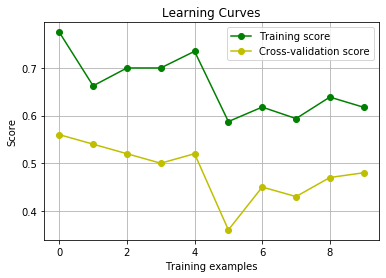

In [20]:
### Logistic Regression
estimator = LogisticRegression()

draw_learning_curves(X2, y2, estimator, 10)

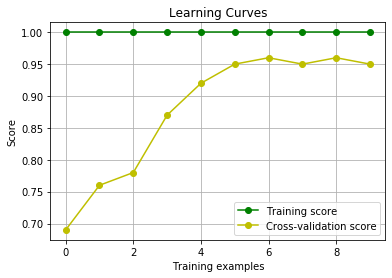

In [16]:
### Decision Tree
estimator = GradientBoostingClassifier()

draw_learning_curves(X2, y2, estimator, 10)

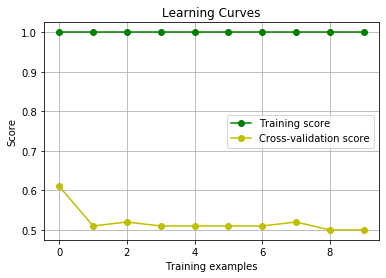

In [17]:
### Support Vector Machine
estimator = SVC(kernel='rbf', gamma=1000)

draw_learning_curves(X2, y2, estimator, 10)

<img src="images/models_fitting.png" width="800" height="700">